<a href="https://colab.research.google.com/github/linhv0/My-Data-Analysis-Small-Projects/blob/main/Prep_and_Clean_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# "dataset_part1" and "dataset_part2" are two compressed (gzip) comma-separated csv
# files that have the exact same structure.

# Import Pandas


from google.colab import files
uploaded = files.upload()

Saving dataset_part2.csv.gz to dataset_part2.csv.gz
Saving dataset_part1.csv.gz to dataset_part1.csv.gz
Saving additional_info_adds.csv.gz to additional_info_adds.csv.gz


In [33]:
import pandas as pd
df = pd.read_csv('dataset_part1.csv.gz', sep=',', compression='gzip', dtype=str)
df1 = pd.read_csv('dataset_part2.csv.gz', sep=',', compression='gzip', dtype=str)


In [34]:
df = pd.concat([df, df1], ignore_index=True)
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23195 entries, 0 to 23194
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     23195 non-null  object
 1   name                   23194 non-null  object
 2   summary                22102 non-null  object
 3   space                  16726 non-null  object
 4   description            22480 non-null  object
 5   neighborhood_overview  15160 non-null  object
 6   notes                  10422 non-null  object
 7   transit                15266 non-null  object
 8   access                 13116 non-null  object
 9   interaction            14561 non-null  object
 10  house_rules            15654 non-null  object
 11  neighbourhood          23194 non-null  object
 12  price                  23195 non-null  object
 13  cleaning_fee           19682 non-null  object
 14  guests_included        23194 non-null  object
 15  extra_people       

,id,name,summary,space,description,neighborhood_overview,notes,transit,access,interaction,house_rules,neighbourhood,price,cleaning_fee,guests_included,extra_people,host_id
0,1419,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,"To learn a little more about our home, see: (U...",All forms of public transportation are easily ...,The whole house and garden are available.,"We will be out of town, but fully accessible b...",This is our much-loved family home. We expect ...,Little Portugal,$469.00,$150.00,1,$0.00,1565
1,8077,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,My husband and I are both artists. I give pain...,Guest room in a luxury condo with access to al...,NaN,NaN,NaN,NaN,NaN,No smoking please.,Downtown Toronto,$104.00,NaN,1,$0.00,22795
2,12604,Seaton Village Parlour Bedroom,Comfortable sofa bed in airy main floor parlour.,Family of 4 (2 kids) plus a friendly dog open...,Comfortable sofa bed in airy main floor parlou...,NaN,NaN,NaN,NaN,NaN,no smoking,The Annex,$69.00,$28.00,1,$21.00,48239
3,23691,Queen Bedroom close to downtown,NaN,Nestled in the middle of a quiet residential n...,Nestled in the middle of a quiet residential n...,NaN,* Laundry facilities are available at the prem...,* Public transit is conveniently located about...,NaN,You are welcome to contact us at any time if t...,* Guests are requested to leave their shoes at...,Fairbank,$72.00,$0.00,2,$20.00,93825
4,26654,World Class downtown @CN Tower Theatre MTCC ga...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",Welcome to 5***** Living - Bohemian decor~ in ...,"CN Tower, TIFF Bell Lightbox, Metro Convention...",There's a reason they call it the Entertainmen...,NaN,"Walk everywhere! Transit at your doorstep, end...",100% use of space and amenities,NaN,No Smoking Parking Available on Request ($20 d...,Downtown Toronto,$199.00,$51.00,2,$18.00,113345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23190,42914765,Diamond suite-- No cleaning fee + free breakfast,"Located in the heart of downtown, our property...",This 200Sq foot room with the Pembroke Inn is ...,"Located in the heart of downtown, our property...",NaN,NaN,NaN,NaN,NaN,NaN,Downtown Toronto,$199.00,NaN,1,$0.00,167034435
23191,42915363,STERILIZED CLEAN - Fashion District Luxury Condo,** New Photos Coming Soon ** Modern and chic u...,We are using Clorox (CLX0.95%) products and Ly...,** New Photos Coming Soon ** Modern and chic u...,NaN,NaN,NaN,NaN,Please message on Airbnb if you need anything.,Please take a moment to go over our booking po...,Downtown Toronto,$109.00,$80.00,2,$10.00,341738429
23192,42915787,Lovely Cosy and private space to feel like home,NaN,NaN,Private entrance right at your door steps,NaN,NaN,NaN,Private entrance right at your door steps,NaN,NaN,New Toronto,$40.00,$15.00,1,$0.00,321259702
23193,42916243,Comfy bunkbed in a shared room in Scarborough TTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Malvern,$17.00,$25.00,1,$0.00,327456656


In [35]:
# How many duplicates are in the dataset?

df.duplicated().any()

True

In [36]:
df.duplicated().value_counts()

,count
False,23005
True,190


In [37]:
df=df.drop_duplicates()

In [38]:
df.duplicated().any()

False

In [39]:
# Print the 5 first observations of the columns 'price', 'cleaning_fee' and 'extra_people'.
print(df[['price', 'cleaning_fee', 'extra_people']].head())

     price cleaning_fee extra_people
0  $469.00      $150.00        $0.00
1  $104.00          NaN        $0.00
2   $69.00       $28.00       $21.00
3   $72.00        $0.00       $20.00
4  $199.00       $51.00       $18.00


In [40]:
# We want the 'price', 'cleaning_fee' and 'extra_people' variables to be float variables.
# remove $
df['price'] = df['price'].str.replace('$', '')
df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '')
df['extra_people'] = df['extra_people'].str.replace('$', '')

<ipython-input-40-d52607dc86f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace('$', '')
<ipython-input-40-d52607dc86f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaning_fee'] = df['cleaning_fee'].str.replace('$', '')
<ipython-input-40-d52607dc86f6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [41]:
# convert 'cleaning_fee', 'extra_people' and 'price' to float.
df['price'] = df['price'].str.replace(',', '')

<ipython-input-41-bdd7eb7cf94c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].str.replace(',', '')


In [42]:
df['price'] = df['price'].astype(float)
df['cleaning_fee'] = df['cleaning_fee'].astype(float)
df['extra_people'] = df['extra_people'].astype(float)

<ipython-input-42-a18934ff9cca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(float)
<ipython-input-42-a18934ff9cca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaning_fee'] = df['cleaning_fee'].astype(float)
<ipython-input-42-a18934ff9cca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [43]:
print(df['price'].dtype)

float64


In [44]:
# add info to the dataset.
# the file uploaded below contains additional information such as the number of bathrooms, bedrooms, square feet, etc.

add_data = pd.read_csv('/content/additional_info_adds.csv.gz', sep = ',', compression = 'gzip', dtype=str)

In [45]:
add_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23005 entries, 0 to 23004
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             23005 non-null  object
 1   property_type  23005 non-null  object
 2   room_type      23004 non-null  object
 3   accommodates   23004 non-null  object
 4   bathrooms      22997 non-null  object
 5   bedrooms       22977 non-null  object
 6   beds           22809 non-null  object
 7   bed_type       23004 non-null  object
 8   amenities      23004 non-null  object
 9   square_feet    138 non-null    object
dtypes: object(10)
memory usage: 1.8+ MB


In [46]:
add_data.duplicated().any()

False

In [47]:
df = pd.merge(df, add_data, on ='id')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23005 entries, 0 to 23004
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     23005 non-null  object 
 1   name                   23004 non-null  object 
 2   summary                21946 non-null  object 
 3   space                  16571 non-null  object 
 4   description            22294 non-null  object 
 5   neighborhood_overview  15040 non-null  object 
 6   notes                  10331 non-null  object 
 7   transit                15147 non-null  object 
 8   access                 13000 non-null  object 
 9   interaction            14454 non-null  object 
 10  house_rules            15510 non-null  object 
 11  neighbourhood          23004 non-null  object 
 12  price                  23005 non-null  float64
 13  cleaning_fee           19523 non-null  float64
 14  guests_included        23004 non-null  object 
 15  ex

In [52]:
# convert variables to float
df[['bathrooms', 'bedrooms', 'beds']] = df[['bathrooms', 'bedrooms', 'beds']].astype(float)

In [53]:
print(df[['price', 'bathrooms', 'bedrooms', 'beds']].describe())

              price     bathrooms      bedrooms          beds
count  2.300500e+04  22997.000000  22977.000000  22809.000000
mean   5.239714e+02      1.253294      1.319624      1.668420
std    5.778965e+04      0.558465      0.870004      1.133249
min    0.000000e+00      0.000000      0.000000      0.000000
25%    6.500000e+01      1.000000      1.000000      1.000000
50%    9.900000e+01      1.000000      1.000000      1.000000
75%    1.590000e+02      1.000000      2.000000      2.000000
max    8.765243e+06      8.000000     15.000000     16.000000


In [54]:
# There are some weird things going on here:
# 1) some airbnbs seem to be free (min price is 0)
# 2) some airbnbs have no beds (min beds is 0)
# 3) some airbnbs have no bedrooms (min bedrooms is 0)
# 4) some airbnbs have no bathrooms (min bathrooms is 0)
# 5) there is an airbnb that is VERY expensive.

# keep the airbnbs with a positive price (i.e. strictly
# larger than 0), a positive number of beds, a positive number of bedrooms and a positive
# number of bathrooms

df = df[df['price'] > 0]
df = df[df['beds'] > 0]
df = df[df['bedrooms'] > 0]
df = df[df['bathrooms'] > 0]
print(df.describe())

              price  cleaning_fee  extra_people     bathrooms      bedrooms  \
count  2.067100e+04  17675.000000  20670.000000  20671.000000  20671.000000   
mean   5.705983e+02     62.793494     14.407209      1.274950      1.429781   
std    6.096494e+04     50.412093     24.163709      0.568869      0.822513   
min    1.200000e+01      0.000000      0.000000      0.500000      1.000000   
25%    6.500000e+01     25.000000      0.000000      1.000000      1.000000   
50%    9.900000e+01     50.000000      8.000000      1.000000      1.000000   
75%    1.660000e+02     85.000000     20.000000      1.500000      2.000000   
max    8.765243e+06    893.000000    414.000000      8.000000     15.000000   

               beds  
count  20671.000000  
mean       1.744666  
std        1.140289  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       16.000000  


In [56]:
df = df[df['bathrooms'] >= 1]
print(df.describe())

              price  cleaning_fee  extra_people     bathrooms      bedrooms  \
count  2.064400e+04  17660.000000  20643.000000  20644.000000  20644.000000   
mean   5.711700e+02     62.810419     14.413603      1.275964      1.430343   
std    6.100479e+04     50.419869     24.176026      0.568550      0.822904   
min    1.200000e+01      0.000000      0.000000      1.000000      1.000000   
25%    6.500000e+01     25.000000      0.000000      1.000000      1.000000   
50%    9.900000e+01     51.000000      8.000000      1.000000      1.000000   
75%    1.660000e+02     85.000000     20.000000      1.500000      2.000000   
max    8.765243e+06    893.000000    414.000000      8.000000     15.000000   

               beds  
count  20644.000000  
mean       1.745543  
std        1.140737  
min        1.000000  
25%        1.000000  
50%        1.000000  
75%        2.000000  
max       16.000000  


In [57]:
import matplotlib.pyplot as plt


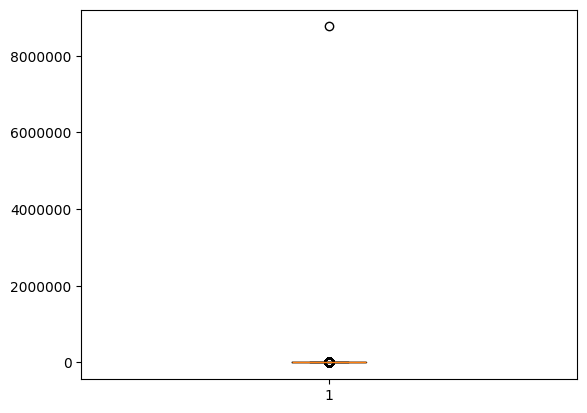

In [58]:
fig, ax = plt.subplots()
ax.boxplot(df['price'])
plt.ticklabel_format(style='plain', axis='y')
plt.show()


In [59]:
# Let's find this observation in the dataset to see what other info
# on this airbnb we have.

# Print the observation that has a price strictly larger than $8,000,000 and inspect the output.
print(df[df['price']>8000000])


             id       name summary space description neighborhood_overview  \
10794  99999999  luxurious     NaN   NaN       Fancy                   NaN   

      notes transit access interaction  ... host_id property_type  room_type  \
10794   NaN     NaN    NaN         NaN  ...     NaN   one bedroom        NaN   

       accommodates bathrooms  bedrooms beds bed_type amenities square_feet  
10794           NaN       1.0       1.0  1.0      NaN       NaN         NaN  

[1 rows x 26 columns]


In [68]:
# This observation is weird: it is an extremely expensive airbnb with only one bedroom.
# Also look at the name and description of the add.
# Clearly, this is an outlier. Drop this observation by keeping data whose price
# is strictly lower than $8,000,000.
df = df[df['price'] < 8000000]

In [69]:
df['price'].describe()

,price
count,20635.000000
mean,142.388515
std,158.416642
min,12.000000
25%,65.000000
50%,99.000000
75%,166.000000
max,4000.000000


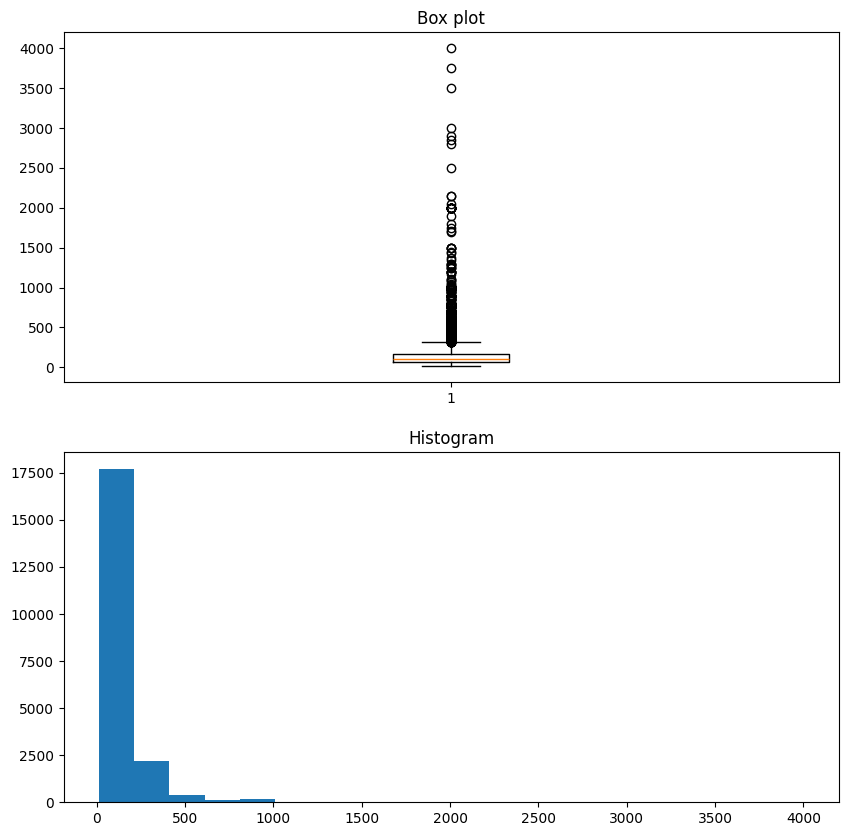

In [70]:
# Plot again the box plot with matplotlib to detect if there are outliers.
# This time, add a histogram with 20 bins to the plot. Plot the box plot and the histogram
# on top of each other (the box plot should be first).

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
ax[0].boxplot(df['price'])
ax[0].set_title('Box plot')
ax[0].ticklabel_format(style='plain', axis='y')

ax[1].hist(df['price'], bins=20)
ax[1].set_title('Histogram')
ax[1].ticklabel_format(useOffset=False, style='plain')

plt.show()






In [71]:

# Using numpy, compute and store the 90th percentile of 'price' as 'd9'.

import numpy as np
d9 = np.percentile(df['price'], 90)
print(d9)


250.0


In [72]:
df = df[df['price'] < d9]

In [73]:
print(df['price'].describe())

count    18285.000000
mean       103.865628
std         53.636873
min         12.000000
25%         59.000000
50%         98.000000
75%        139.000000
max        249.000000
Name: price, dtype: float64


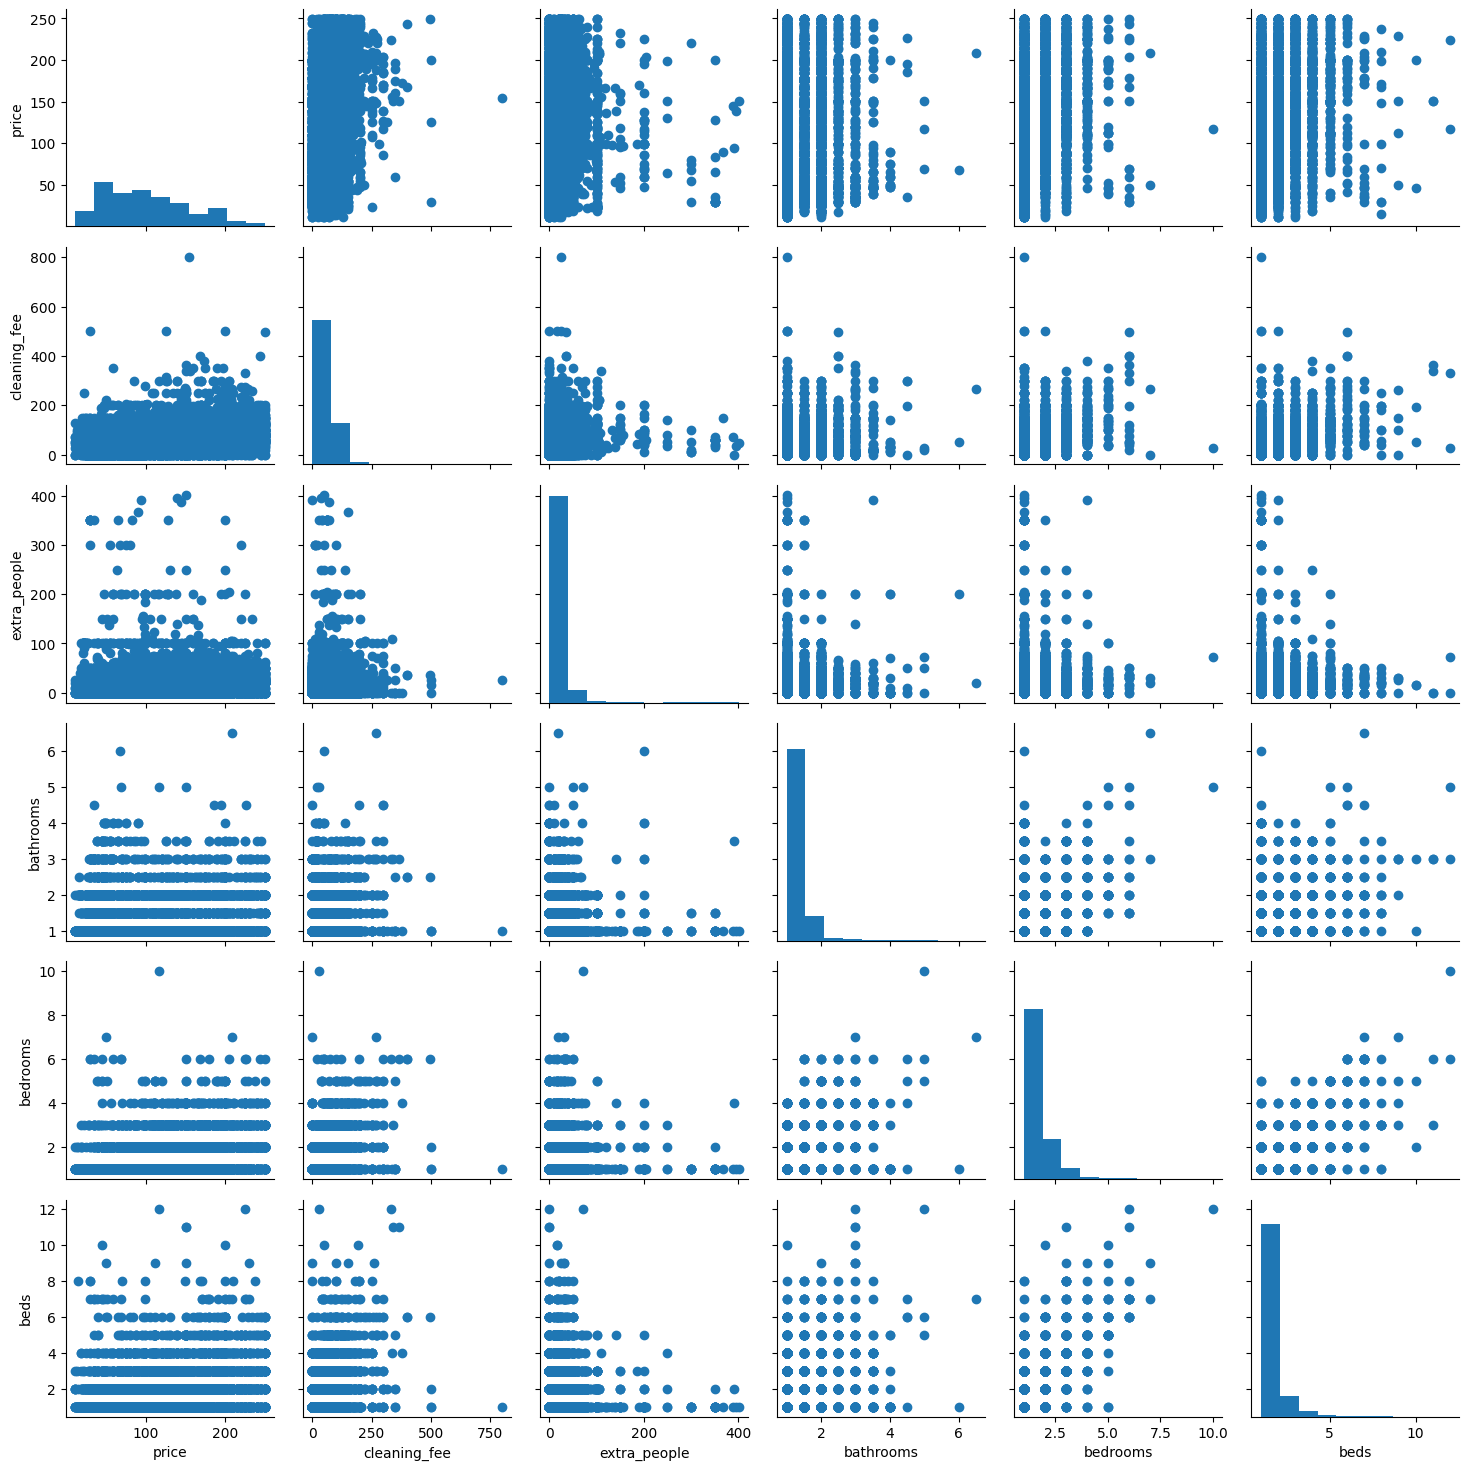

In [74]:


# Import the right library as sns.

import seaborn as sns
g = sns.PairGrid(df)
# Create histograms on the diagonal
g = g.map_diag(plt.hist)

g = g.map_offdiag(plt.scatter)
plt.show()